# Discrete Fourier Transform (DFT) by Fast Fourier Transform (FFT)

In [1]:
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

print(sys.version[:5])
print(mpl.__version__)
print(np.version.version)

3.5.4
2.1.0
1.13.3


## Generate signal

By summing sin waves with random amplitude and phase.

In [2]:
xs = np.arange(0, 1, 0.01)
print(len(xs))
delta = xs[1]
print(delta)

100
0.01


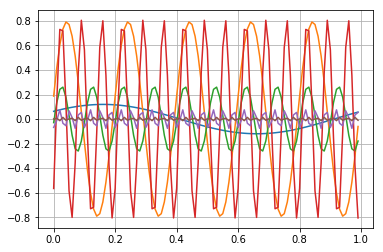

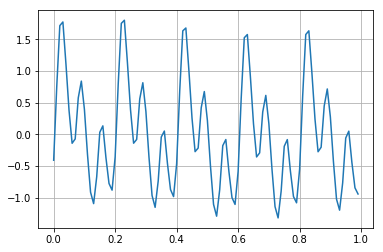

In [3]:
signal = np.zeros_like(xs)

for f in (1, 5, 10, 15, 30, 40):
    A = np.random.random()
    P = np.random.random()
    ys = A * np.sin(2*np.pi*f*xs + 2*np.pi*P)
    signal += ys
    plt.plot(xs, ys)

plt.grid()
plt.show()

plt.plot(xs, signal)
plt.grid()
plt.show()

## FFT

In [4]:
frequencies = np.fft.fftfreq(len(signal), d=xs[1])
print(frequencies, len(frequencies))

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49. -50. -49. -48. -47. -46. -45. -44. -43. -42. -41.
 -40. -39. -38. -37. -36. -35. -34. -33. -32. -31. -30. -29. -28. -27. -26.
 -25. -24. -23. -22. -21. -20. -19. -18. -17. -16. -15. -14. -13. -12. -11.
 -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.] 100


In [5]:
dft = np.fft.fft(signal)
print(dft.shape, dft.dtype)

(100,) complex128


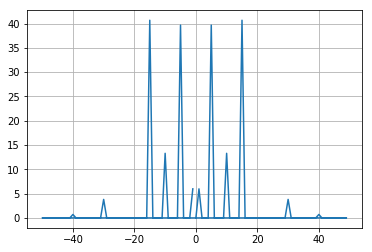

In [6]:
amplitudes = np.sqrt(dft.real**2+dft.imag**2)

plt.plot(frequencies, amplitudes)
plt.grid()
plt.show()

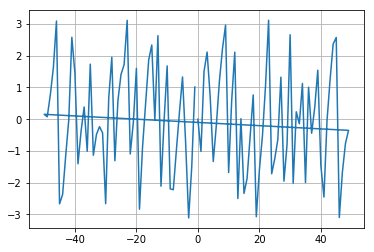

In [7]:
phases = np.arctan2(dft.imag, dft.real)

plt.plot(frequencies, phases)
plt.grid()
plt.show()

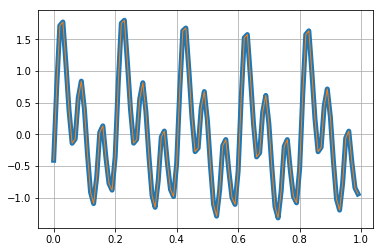

In [8]:
## Getting signal back

isignal = np.zeros_like(xs)

norm_dft = dft * delta
amplitudes = np.abs(norm_dft)
phases = np.angle(norm_dft)

for A, f, P in zip(amplitudes, frequencies, phases):
    isignal += A * np.cos(2*np.pi*f*xs + P)

plt.plot(xs, signal, lw=5)
plt.plot(xs, isignal, lw=1)
plt.grid()
plt.show()

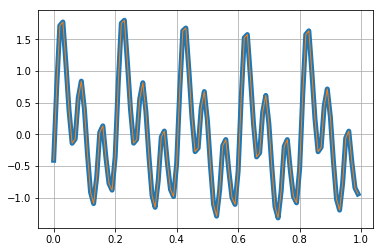

In [9]:
isignal = np.fft.irfft(dft, n=len(xs))

plt.plot(xs, signal, lw=5)
plt.plot(xs, isignal, lw=1)
plt.grid()
plt.show()

## rFFT

In [10]:
frequencies = np.fft.rfftfreq(len(signal), d=xs[1])
print(frequencies)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.]


In [11]:
dft = np.fft.rfft(signal)
print(dft.shape, dft.dtype)

(51,) complex128


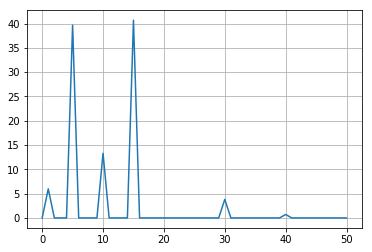

In [12]:
amplitudes = np.abs(dft)

plt.plot(frequencies, amplitudes)
plt.grid()
plt.show()

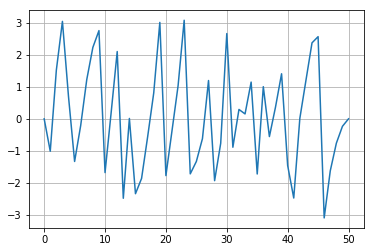

In [13]:
phases = np.angle(dft)

plt.plot(frequencies, phases)
plt.grid()
plt.show()

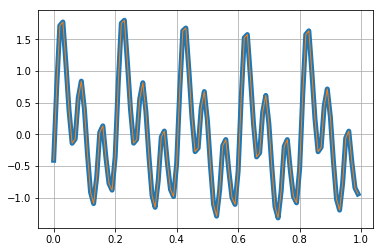

In [14]:
## Getting signal back

isignal = np.zeros_like(xs)

norm_dft = dft * delta
amplitudes = np.abs(norm_dft)
phases = np.angle(norm_dft)

for A, f, P in zip(amplitudes, frequencies, phases):
    isignal += 2*A * np.cos(2*np.pi*f*xs + P)

plt.plot(xs, signal, lw=5)
plt.plot(xs, isignal, lw=1)
plt.grid()
plt.show()